# BioBot_FDS_YB_08_IMPLEMENTING_LSTM
## Deliverable_08: Implementing LSTM RNN Models
Author/code developer: Yan Bello. 04/12/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---



## 8.0. Step 0. Need to mount Google Drive for Colab

In [0]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive: 
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL/"

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 8.1. Step 1. Import the processed dataset

In [0]:
# Step 1. Import the processed dataset
import os
from os import walk


my_data_file_name = FILE_DIRECTORY + "DS_ADL_Falls_NEW_181202.txt"

import pandas as pd

# Create a data frame and load the data
df_ADL_Falls = pd.DataFrame(pd.read_csv(my_data_file_name, sep = ','))

df_ADL_Falls.drop('0', axis=1, inplace=True)

df_only_ADLs = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "D"]
df_only_Falls = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "F"]

# display the data frame
print(df_only_ADLs.head())
print(df_only_ADLs.tail())
print(df_only_Falls.head())
print(df_only_Falls.tail())

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  \
0   -13  -252   -51   -89   -38   -18   -45 -1020  -172  1.005615   
1    -6  -250   -48   -87   -41   -21   -41 -1017  -169  0.994676   
2    -9  -247   -50   -84   -43   -24   -38 -1007  -163  0.985041   
3    -8  -247   -46   -81   -40   -27   -36 -1005  -163  0.981931   
4    -8  -243   -46   -78   -31   -30   -35  -995  -165  0.966582   

         ...          S2_AV_X   S2_AV_Y   S2_AV_Z  S3_N_HOR  S3_N_VER  \
0        ...        -5.432129 -2.319336 -1.098633  1.010157  0.173622   
1        ...        -5.310059 -2.502441 -1.281738  1.006783  0.169826   
2        ...        -5.126953 -2.624512 -1.464844  0.996198  0.163448   
3        ...        -4.943848 -2.441406 -1.647949  0.994270  0.163016   
4        ...        -4.760742 -1.892090 -1.831055  0.984949  0.164718   

   S3_N_XYZ  Age_Cat  Fall_ADL Act_Type              File  
0  1.011112       SA         D      D09  D09_SA09_R01.txt  
1  1.007579       SA      

### Step 1.1 Check the size of dataset (each type of event: Falls & ADLs)

In [0]:
# Step 1.1 Check the size of dataset (each type of event: Falls & ADLs)
# show the data frame
print("df_only_ADLs.head()")
print(df_only_ADLs.head())
print("df_only_ADLs.tail()")
print(df_only_ADLs.tail())
print("df_only_Falls.head()")
print(df_only_Falls.head())
print("df_only_Falls.tail()")
print(df_only_Falls.tail())

df_only_ADLs.head()
   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  \
0   -13  -252   -51   -89   -38   -18   -45 -1020  -172  1.005615   
1    -6  -250   -48   -87   -41   -21   -41 -1017  -169  0.994676   
2    -9  -247   -50   -84   -43   -24   -38 -1007  -163  0.985041   
3    -8  -247   -46   -81   -40   -27   -36 -1005  -163  0.981931   
4    -8  -243   -46   -78   -31   -30   -35  -995  -165  0.966582   

         ...          S2_AV_X   S2_AV_Y   S2_AV_Z  S3_N_HOR  S3_N_VER  \
0        ...        -5.432129 -2.319336 -1.098633  1.010157  0.173622   
1        ...        -5.310059 -2.502441 -1.281738  1.006783  0.169826   
2        ...        -5.126953 -2.624512 -1.464844  0.996198  0.163448   
3        ...        -4.943848 -2.441406 -1.647949  0.994270  0.163016   
4        ...        -4.760742 -1.892090 -1.831055  0.984949  0.164718   

   S3_N_XYZ  Age_Cat  Fall_ADL Act_Type              File  
0  1.011112       SA         D      D09  D09_SA09_R01.txt  
1  1.0

### Step 1.2 Shape of datasets

In [0]:
# Step 1.2 Shape of datasets
print("df_only_ADLs")
print(df_only_ADLs.shape)
print("df_only_Falls")
print(df_only_Falls.shape)


df_only_ADLs
(1080598, 22)
df_only_Falls
(1080598, 22)


## 8.2. Step 2. Prepare a DataFrame with the relevant features 

In [0]:
# Step 2. Prepare a DataFrame with the relevant features 
# 1st trial: Using only Sensor 1 (X, Y, Z)

#series = pd.DataFrame(df_only_ADLs)
#series100 = df_only_ADLs.loc[0:100, ["S1_X","S1_Y","S1_Z","S2_X","S2_Y","S2_Z","S3_X","S3_Y","S3_Z"]]
series = df_only_Falls.loc[:, ["S1_X","S1_Y","S1_Z"]]

In [0]:
series.describe()

,S1_X,S1_Y,S1_Z
count,1.080598e+06,1.080598e+06,1.080598e+06
mean,-8.107005e+00,-1.193407e+02,-5.099350e+01
std,1.751743e+02,1.880731e+02,1.733202e+02
min,-4.096000e+03,-4.096000e+03,-4.096000e+03
25%,-4.400000e+01,-2.370000e+02,-1.460000e+02
50%,1.000000e+00,-1.560000e+02,-5.600000e+01
75%,3.700000e+01,6.000000e+00,3.300000e+01
max,4.094000e+03,4.092000e+03,4.091000e+03


## 8.3. Step 3. Scale the data. Impotant to use data as input of LSTM

In [0]:
# Step 3. Scale the data. Impotant to use data as input of LSTM
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(series)
scaled_Series = scaler.transform(series)
print(scaled_Series.shape)
df_Scaled_3col = pd.DataFrame(scaled_Series)
df_Scaled_3col.columns = series.columns
df_Scaled_3col.describe()

(1080598, 3)


,S1_X,S1_Y,S1_Z
count,1.080598e+06,1.080598e+06,1.080598e+06
mean,4.991322e-01,4.856692e-01,4.940768e-01
std,2.138880e-02,2.296936e-02,2.117017e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.947497e-01,4.712995e-01,4.824722e-01
50%,5.002442e-01,4.811920e-01,4.934652e-01
75%,5.046398e-01,5.009770e-01,5.043361e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


In [0]:
# For memory reasons keep only 50% of records
print(df_Scaled_3col.shape)
df_Scaled_3col = pd.DataFrame(df_Scaled_3col.iloc[:500000,:])
print(df_Scaled_3col.shape)

(1080598, 3)
(500000, 3)


### Step 3.1 shift the date 100 steps

In [0]:
# Step 3.1 shift the date 100 steps
def shift_data(my_data, nr_steps_to_shift=100, starting_step=0, txt_shift = "Step:"):

  window_size =  nr_steps_to_shift # número de pasos que usaremos en la LSTM

  series2 = my_data.copy()
  shifted = series2.shift(-(starting_step+1))
  print(txt_shift + str(1)+"/"+str(window_size))
  
  if window_size >1:
    for index in range(window_size-1):
      shifted = pd.concat([shifted, series2.shift(-(starting_step+index+2))], axis=1)
      print(txt_shift + str(index+2)+"/"+str(window_size))
    
  del series2
  
  return shifted    
  
df_Scaled1 = shift_data(df_Scaled_3col, 100, txt_shift="1-bloque, step:")

print(df_Scaled1.shape)



1-bloque, step:1/100
1-bloque, step:2/100
1-bloque, step:3/100
1-bloque, step:4/100
1-bloque, step:5/100
1-bloque, step:6/100
1-bloque, step:7/100
1-bloque, step:8/100
1-bloque, step:9/100
1-bloque, step:10/100
1-bloque, step:11/100
1-bloque, step:12/100
1-bloque, step:13/100
1-bloque, step:14/100
1-bloque, step:15/100
1-bloque, step:16/100
1-bloque, step:17/100
1-bloque, step:18/100
1-bloque, step:19/100
1-bloque, step:20/100
1-bloque, step:21/100
1-bloque, step:22/100
1-bloque, step:23/100
1-bloque, step:24/100
1-bloque, step:25/100
1-bloque, step:26/100
1-bloque, step:27/100
1-bloque, step:28/100
1-bloque, step:29/100
1-bloque, step:30/100
1-bloque, step:31/100
1-bloque, step:32/100
1-bloque, step:33/100
1-bloque, step:34/100
1-bloque, step:35/100
1-bloque, step:36/100
1-bloque, step:37/100
1-bloque, step:38/100
1-bloque, step:39/100
1-bloque, step:40/100
1-bloque, step:41/100
1-bloque, step:42/100
1-bloque, step:43/100
1-bloque, step:44/100
1-bloque, step:45/100
1-bloque, step:46/1

### Step 3.1b. Try to append/shift another 100 steps

In [0]:
# Step 3.1b. Try to append/shift another 100 steps

df_Scaled2 = shift_data(df_Scaled_3col, 100, 100, txt_shift="2-bloque, step:")

df_Scaled = pd.concat([df_Scaled1, df_Scaled2], axis=1)

del df_Scaled1, df_Scaled2

print(df_Scaled.shape)
print(df_Scaled.head())
print(df_Scaled.tail())


2-bloque, step:1/100
2-bloque, step:2/100
2-bloque, step:3/100
2-bloque, step:4/100
2-bloque, step:5/100
2-bloque, step:6/100
2-bloque, step:7/100
2-bloque, step:8/100
2-bloque, step:9/100
2-bloque, step:10/100
2-bloque, step:11/100
2-bloque, step:12/100
2-bloque, step:13/100
2-bloque, step:14/100
2-bloque, step:15/100
2-bloque, step:16/100
2-bloque, step:17/100
2-bloque, step:18/100
2-bloque, step:19/100
2-bloque, step:20/100
2-bloque, step:21/100
2-bloque, step:22/100
2-bloque, step:23/100
2-bloque, step:24/100
2-bloque, step:25/100
2-bloque, step:26/100
2-bloque, step:27/100
2-bloque, step:28/100
2-bloque, step:29/100
2-bloque, step:30/100
2-bloque, step:31/100
2-bloque, step:32/100
2-bloque, step:33/100
2-bloque, step:34/100
2-bloque, step:35/100
2-bloque, step:36/100
2-bloque, step:37/100
2-bloque, step:38/100
2-bloque, step:39/100
2-bloque, step:40/100
2-bloque, step:41/100
2-bloque, step:42/100
2-bloque, step:43/100
2-bloque, step:44/100
2-bloque, step:45/100
2-bloque, step:46/1

### Step 3.2 Rename columns

In [0]:
# Step 3.2 Rename columns
col_names = list()
#col_names = ['S1_X_0','S1_Y_0',	'S1_Z_0']
for i in range(int(len(df_Scaled.columns)/3)):
  col_names += ['S1_X_'+ str(i+1),'S1_Y_'+ str(i+1),'S1_Z_'+ str(i+1)]


df_Scaled.columns = col_names
print(df_Scaled.columns)

Index(['S1_X_1', 'S1_Y_1', 'S1_Z_1', 'S1_X_2', 'S1_Y_2', 'S1_Z_2', 'S1_X_3',
       'S1_Y_3', 'S1_Z_3', 'S1_X_4',
       ...
       'S1_Z_197', 'S1_X_198', 'S1_Y_198', 'S1_Z_198', 'S1_X_199', 'S1_Y_199',
       'S1_Z_199', 'S1_X_200', 'S1_Y_200', 'S1_Z_200'],
      dtype='object', length=600)


### Step 3.3 Removing the NA's resulting from the shift

In [0]:
# Step 3.3 Removing the NA's resulting from the shift
# As we shifted 100 times, there would be 100 rows with NA's

print(df_Scaled.tail())
print(df_Scaled.shape)

# eliminamos los NA's (resultantes del shift)
df_Scaled.dropna(inplace=True)

print("df_Scaled")
print(df_Scaled.tail())
print(df_Scaled.shape)


          S1_X_1    S1_Y_1    S1_Z_1    S1_X_2    S1_Y_2    S1_Z_2    S1_X_3  \
499995  0.492430  0.510503  0.464883  0.492186  0.510381  0.465250  0.492430   
499996  0.492186  0.510381  0.465250  0.492430  0.510503  0.465616  0.492552   
499997  0.492430  0.510503  0.465616  0.492552  0.510381  0.465861       NaN   
499998  0.492552  0.510381  0.465861       NaN       NaN       NaN       NaN   
499999       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          S1_Y_3    S1_Z_3    S1_X_4    ...     S1_Z_197  S1_X_198  S1_Y_198  \
499995  0.510503  0.465616  0.492552    ...          NaN       NaN       NaN   
499996  0.510381  0.465861       NaN    ...          NaN       NaN       NaN   
499997       NaN       NaN       NaN    ...          NaN       NaN       NaN   
499998       NaN       NaN       NaN    ...          NaN       NaN       NaN   
499999       NaN       NaN       NaN    ...          NaN       NaN       NaN   

        S1_Z_198  S1_X_199  S1_Y_199  

### Step 3.4 Separate the columns of features (x) and prediction (y)

In [0]:
# Step 3.4 Separate the columns of features (x) and prediction (y)
# In this case we take into account that the number of steps = 100

df_Scaled_y = pd.DataFrame(df_Scaled.iloc[:,-300:])
df_Scaled_x = pd.DataFrame(df_Scaled.iloc[:,:-300])

print("df_Scaled_x")
print(df_Scaled_x.head())
print(df_Scaled_x.shape)
print("df_Scaled_y")
print(df_Scaled_y.head())
print(df_Scaled_y.shape)

df_Scaled_x
     S1_X_1    S1_Y_1    S1_Z_1    S1_X_2    S1_Y_2    S1_Z_2    S1_X_3  \
0  0.496215  0.474475  0.491389  0.494505  0.474963  0.491511  0.493040   
1  0.494505  0.474963  0.491511  0.493040  0.475452  0.492122  0.492430   
2  0.493040  0.475452  0.492122  0.492430  0.475330  0.492366  0.491697   
3  0.492430  0.475330  0.492366  0.491697  0.475452  0.492732  0.491087   
4  0.491697  0.475452  0.492732  0.491087  0.475085  0.493099  0.491575   

     S1_Y_3    S1_Z_3    S1_X_4    ...      S1_Z_97   S1_X_98   S1_Y_98  \
0  0.475452  0.492122  0.492430    ...     0.488946  0.500122  0.472521   
1  0.475330  0.492366  0.491697    ...     0.489557  0.498901  0.470689   
2  0.475452  0.492732  0.491087    ...     0.489801  0.497558  0.468735   
3  0.475085  0.493099  0.491575    ...     0.489923  0.497070  0.467025   
4  0.475574  0.492977  0.492308    ...     0.490412  0.495849  0.465559   

    S1_Z_98   S1_X_99   S1_Y_99   S1_Z_99  S1_X_100  S1_Y_100  S1_Z_100  
0  0.489557 

In [0]:
# import numpy
import numpy as np

# dividimos el dataset para training y test:
n_train = int(df_Scaled_y.shape[0]*0.5)
n_val = int(df_Scaled_y.shape[0]*0.3)
print("n_train:" + str(n_train))
print("n_val:" + str(n_val))

train_x = np.array(df_Scaled_x.iloc[:n_train, :])
train_y = np.array(df_Scaled_y[:n_train])
val_x = np.array(df_Scaled_x.iloc[n_train:n_train+n_val, :])
val_y = np.array(df_Scaled_y[n_train:n_train+n_val])
test_x = np.array(df_Scaled_x.iloc[n_train+n_val:, :])
test_y = np.array(df_Scaled_y[n_train+n_val:])

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], 100, 3))
val_x = val_x.reshape((val_x.shape[0], 100, 3))
test_x = test_x.reshape((test_x.shape[0], 100, 3))

train_y = train_y.reshape((train_y.shape[0], 100, 3))
val_y = val_y.reshape((val_y.shape[0], 100, 3))
test_y = test_y.reshape((test_y.shape[0], 100, 3))

print("training sets (x,y)")
print(train_x.shape, train_y.shape)
print("val sets (x,y)")
print(val_x.shape, val_y.shape)      
print("test sets (x,y)")
print(test_x.shape, test_y.shape)

n_train:249900
n_val:149940
training sets (x,y)
(249900, 100, 3) (249900, 100, 3)
val sets (x,y)
(149940, 100, 3) (149940, 100, 3)
test sets (x,y)
(99960, 100, 3) (99960, 100, 3)


In [0]:
train_xp = train_x[:10000,:,:]
train_yp = train_y[:10000,:]
val_xp = val_x[:5000,:,:]
val_yp = val_y[:5000,:]
test_xp = test_x[:5000,:,:]
test_yp = test_y[:5000,:]

In [0]:
print(train_xp.shape,train_yp.shape)
print(val_xp.shape,val_yp.shape)
print(test_xp.shape,test_yp.shape)

(10000, 100, 3) (10000, 100, 3)
(5000, 100, 3) (5000, 100, 3)
(5000, 100, 3) (5000, 100, 3)


## 8.4. Design, compile and train the LSTM Network

In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow import keras

# Design the LSTM Network
my_model_NN = keras.Sequential()
my_model_NN.add(keras.layers.Dropout(0.5))
my_model_NN.add(keras.layers.LSTM(100, activation='relu', input_shape=(train_xp.shape[1], train_xp.shape[2]),return_sequences=True))
my_model_NN.add(keras.layers.Dropout(0.5))
my_model_NN.add(keras.layers.Dense(3))



### Fit the LSTM Model

In [0]:

# fit network
history = my_model_NN.fit(train_xp, train_yp, epochs=10, batch_size=100, validation_data=(val_xp, val_yp), verbose=2, shuffle=False)


Train on 10000 samples, validate on 5000 samples
Epoch 1/10
 - 36s - loss: 0.0842 - val_loss: 0.0290
Epoch 2/10
 - 35s - loss: 0.0289 - val_loss: 0.0255
Epoch 3/10
 - 35s - loss: 0.0256 - val_loss: 0.0235
Epoch 4/10
 - 35s - loss: 0.0238 - val_loss: 0.0217
Epoch 5/10
 - 35s - loss: 0.0208 - val_loss: 0.0206
Epoch 6/10
 - 35s - loss: 0.0189 - val_loss: 0.0199
Epoch 7/10
 - 35s - loss: 0.0175 - val_loss: 0.0180
Epoch 8/10
 - 35s - loss: 0.0165 - val_loss: 0.0184
Epoch 9/10
 - 35s - loss: 0.0157 - val_loss: 0.0166
Epoch 10/10
 - 36s - loss: 0.0158 - val_loss: 0.0146


### Compile the LSTM Model

In [0]:
my_model_NN.compile(loss='mae', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
lstm_2 (LSTM)                multiple                  41600     
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  303       
Total params: 41,903
Trainable params: 41,903
Non-trainable params: 0
_________________________________________________________________


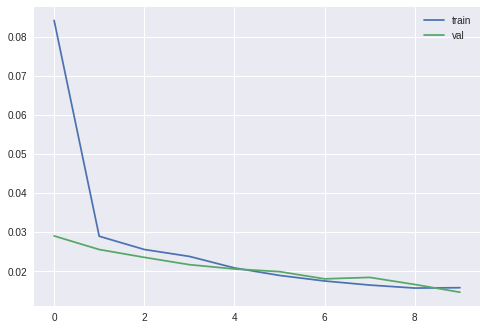

In [0]:
my_model_NN.summary()


# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
#pyplot.ylim(0,0.08)
pyplot.legend()
pyplot.show()

In [0]:
test_xp[0:1,:,:].shape

(1, 100, 3)

In [0]:
test_xp[0:1,:,:].shape

(1, 100, 3)

### Predictions with the LSTM Model

In [0]:
pred_yp = my_model_NN.predict(test_xp[0:1,:,:])

### Visualize results of the LSTM

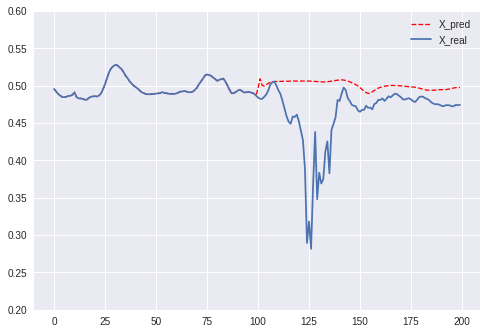

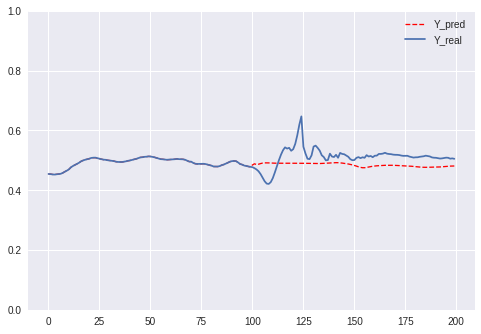

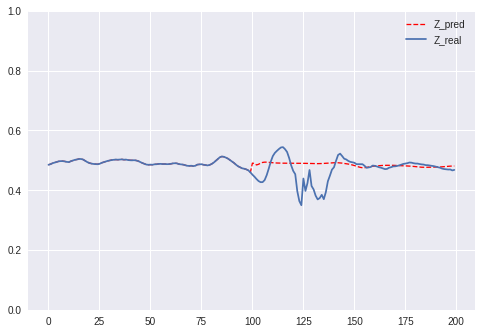

In [0]:
# plot history
x_plot = np.append(test_yp[0][:,0], pred_yp[0][:,0])
pyplot.plot(x_plot, label='X_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_x = np.append(test_yp[0][:,0], test_yp[100][:,0])
pyplot.plot(test_yp_x, label='X_real')
pyplot.ylim(0.2,0.6)
pyplot.legend()
pyplot.show()

y_plot = np.append(test_yp[0][:,1], pred_yp[0][:,1])
pyplot.plot(y_plot, label='Y_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_y = np.append(test_yp[0][:,1], test_yp[100][:,1])
pyplot.plot(test_yp_y, label='Y_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

z_plot = np.append(test_yp[0][:,2], pred_yp[0][:,2])
pyplot.plot(z_plot, label='Z_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_z = np.append(test_yp[0][:,2], test_yp[100][:,2])
pyplot.plot(test_yp_z, label='Z_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()


In [0]:
pred_yp = my_model_NN.predict(test_xp[25:26,:,:])

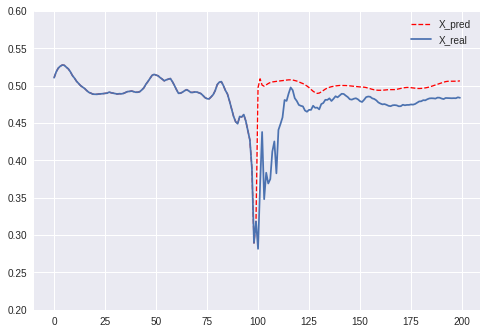

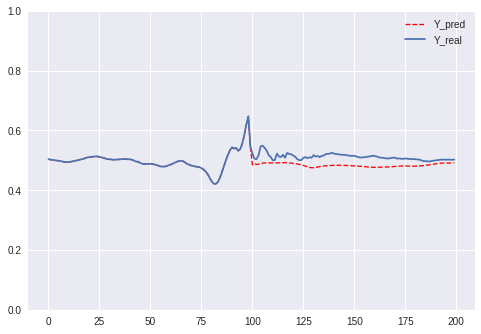

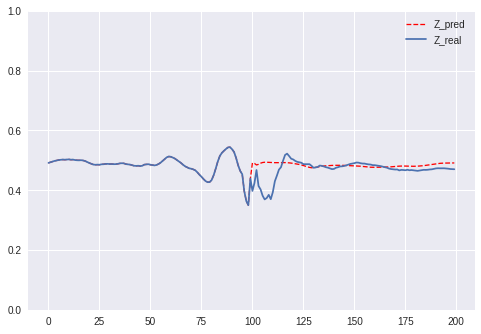

In [0]:
start_index = 26
# plot history
x_plot = np.append(test_yp[start_index][:,0], pred_yp[0][:,0])
pyplot.plot(x_plot, label='X_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_x = np.append(test_yp[start_index][:,0], test_yp[start_index+100][:,0])
pyplot.plot(test_yp_x, label='X_real')
pyplot.ylim(0.2,0.6)
pyplot.legend()
pyplot.show()

y_plot = np.append(test_yp[start_index][:,1], pred_yp[0][:,1])
pyplot.plot(y_plot, label='Y_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_y = np.append(test_yp[start_index][:,1], test_yp[start_index+100][:,1])
pyplot.plot(test_yp_y, label='Y_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

z_plot = np.append(test_yp[start_index][:,2], pred_yp[0][:,2])
pyplot.plot(z_plot, label='Z_pred', color='red', linestyle='dashed', linewidth=1.3)
test_yp_z = np.append(test_yp[start_index][:,2], test_yp[start_index+100][:,2])
pyplot.plot(test_yp_z, label='Z_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()


## 8.5. Predicting  in base of a moving windowq including 100 measurements

In [0]:
# Predicting  in base of a moving windowq including 100 measurements

from math import sqrt
from sklearn.metrics import mean_squared_error

moving_y_pred = []
number_steps =  100
starting_step = 145

# first window:
pred_x = test_xp[number_steps:number_steps+1,:,:]

for i in range(number_steps):
  #prediction input:
  pred_y = my_model_NN.predict(pred_x)
  print(str(i)+"/"+str(number_steps)+": " + str(pred_y[0]))
  pred_x = np.append(pred_x, pred_y[0].reshape(1,1,3), axis=1)
  pred_x = np.delete(pred_x,0,1)
  moving_y_pred.append(list(pred_y[0]))

  
pd_moving_y_pred = pd.DataFrame(moving_y_pred)
pd_moving_y_pred.columns = ("X","Y","Z")

print(pd_moving_y_pred.head())
print(pd_moving_y_pred.tail())

0/100: [0.48562145 0.46946666 0.48614663]
1/100: [0.48538733 0.46915314 0.48598567]
2/100: [0.4849972  0.46874848 0.48576677]
3/100: [0.48456168 0.46832237 0.48551938]
4/100: [0.48413396 0.46790835 0.48526162]
5/100: [0.48373726 0.46752182 0.48500454]
6/100: [0.48337972 0.46716794 0.48475495]
7/100: [0.4830621  0.46684715 0.48451665]
8/100: [0.48278186 0.46655735 0.48429164]
9/100: [0.48253524 0.4662957  0.48408082]
10/100: [0.48231825 0.46605906 0.4838843 ]
11/100: [0.48212707 0.46584454 0.48370185]
12/100: [0.48195836 0.46564957 0.48353282]
13/100: [0.48180908 0.46547183 0.48337644]
14/100: [0.48167673 0.46530938 0.48323205]
15/100: [0.4815591  0.46516064 0.48309883]
16/100: [0.48145425 0.4650242  0.48297593]
17/100: [0.48136058 0.46489877 0.4828626 ]
18/100: [0.4812768  0.4647834  0.48275813]
19/100: [0.4812017  0.46467713 0.48266187]
20/100: [0.48113427 0.46457922 0.48257318]
21/100: [0.48107356 0.46448895 0.4824915 ]
22/100: [0.48101884 0.46440563 0.48241615]
23/100: [0.48096952 0

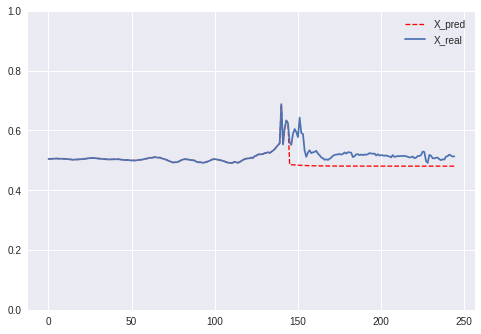

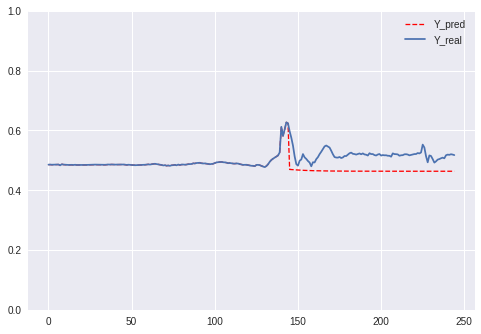

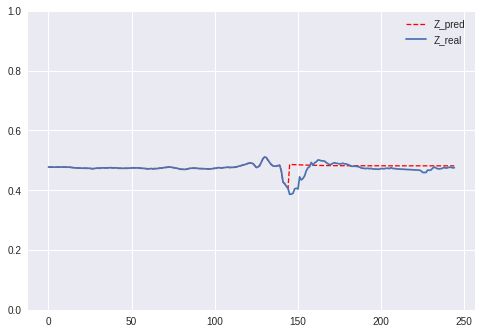

In [0]:
# plot history
x_plot = np.append(test_yp[0:starting_step,0], pd_moving_y_pred.X[:])
pyplot.plot(x_plot, label='X_pred', color='red', linestyle='dashed', linewidth=1.3)
pyplot.plot(test_yp[0:starting_step+number_steps,0], label='X_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

y_plot = np.append(test_yp[0:starting_step,1], pd_moving_y_pred.Y[:])
pyplot.plot(y_plot, label='Y_pred', color='red', linestyle='dashed', linewidth=1.3)
pyplot.plot(test_yp[0:starting_step+number_steps,1], label='Y_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

z_plot = np.append(test_yp[0:starting_step,2], pd_moving_y_pred.Z[:])
pyplot.plot(z_plot, label='Z_pred', color='red', linestyle='dashed', linewidth=1.3)
pyplot.plot(test_yp[0:starting_step+number_steps,2], label='Z_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

## 8.6. Evaluate performance using RMSE Metrics

In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# calculate RMSE
rmse = sqrt(mean_squared_error(pd_moving_y_pred.X, test_yp[starting_step:starting_step+number_steps,0]))
print('X Test RMSE: %.3f' % rmse)
rmse = sqrt(mean_squared_error(pd_moving_y_pred.Y, test_yp[starting_step:starting_step+number_steps,1]))
print('Y Test RMSE: %.3f' % rmse)
rmse = sqrt(mean_squared_error(pd_moving_y_pred.Z, test_yp[starting_step:starting_step+number_steps,2]))
print('Z Test RMSE: %.3f' % rmse)

X Test RMSE: 0.039
Y Test RMSE: 0.093
Z Test RMSE: 0.031


In [0]:
# Predicting in base of a sliding window of 100 measurements

from math import sqrt
from sklearn.metrics import mean_squared_error

moving_y_pred = []
number_steps =  500

for i in range(number_steps):
  #prediction input:
  pred_x = test_xp[i:i+1,:,:]
  pred_y = my_model_NN.predict(pred_x)
  print(str(i)+"/"+str(number_steps)+": " + str(pred_y[0]))
  
  moving_y_pred.append(list(pred_y[0]))

pd_moving_y_pred = pd.DataFrame(moving_y_pred)
pd_moving_y_pred.columns = ("X","Y","Z")

print(pd_moving_y_pred.head())
print(pd_moving_y_pred.tail())

0/500: [0.500721   0.46555546 0.47585866]
1/500: [0.5010144  0.46558362 0.47593427]
2/500: [0.5013143  0.46563467 0.4760105 ]
3/500: [0.50156647 0.46563098 0.47605005]
4/500: [0.50182986 0.46561137 0.47607353]
5/500: [0.5021232  0.46561176 0.47615626]
6/500: [0.50234616 0.46561489 0.47621515]
7/500: [0.502501   0.46565187 0.47628775]
8/500: [0.5024949  0.46542957 0.47623065]
9/500: [0.5026067  0.46551076 0.4763074 ]
10/500: [0.50264883 0.46551406 0.47634757]
11/500: [0.50264126 0.46549064 0.4763605 ]
12/500: [0.50248134 0.46542338 0.47626033]
13/500: [0.50229967 0.46529624 0.47617015]
14/500: [0.5020417  0.46519193 0.47601095]
15/500: [0.50170195 0.46507978 0.47579136]
16/500: [0.50132316 0.46491262 0.47552058]
17/500: [0.50104684 0.4647984  0.47526544]
18/500: [0.50080013 0.4646366  0.4750069 ]
19/500: [0.5006613  0.46449238 0.47480977]
20/500: [0.50059044 0.4643608  0.4746376 ]
21/500: [0.500622   0.46424964 0.47451252]
22/500: [0.5006983  0.46417472 0.474409  ]
23/500: [0.5008813 0.

In [0]:

# plot history
pyplot.plot(pd_moving_y_pred.X, label='X_pred')
pyplot.plot(test_yp[0:number_steps,0], label='X_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

pyplot.plot(pd_moving_y_pred.Y, label='Y_pred')
pyplot.plot(test_yp[0:number_steps,1], label='Y_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()

pyplot.plot(pd_moving_y_pred.Z, label='Z_pred')
pyplot.plot(test_yp[0:number_steps,2], label='Z_real')
pyplot.ylim(0.0,1.0)
pyplot.legend()
pyplot.show()


## 8.7 Evaluating LSTM performance

In [0]:
test_yp[0:4,0]

array([0.5045177 , 0.504884  , 0.50512821, 0.50586081])

In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error

moving_y_pred = []


# make a prediction
for i in range(2):
  #prediction input:
  pred_x = test_xp[i:i+1,:,:]
  pred_y = my_model_NN.predict(pred_x)
  moving_y_pred.appendy_pred.append(pd.DataFrame(my_model_NN.predict(test_xp[i:i+1,:,:])))

print(y_pred)



In [0]:
print(y_pred[0][:][0:1])
# calculate RMSE
#rmse = sqrt(mean_squared_error(test_yp[0:1,:], yhat))
#print('Test RMSE: %.3f' % rmse)

[[0.4927795  0.4794422  0.48468375]]


In [0]:
yhat.shape

(1, 3)

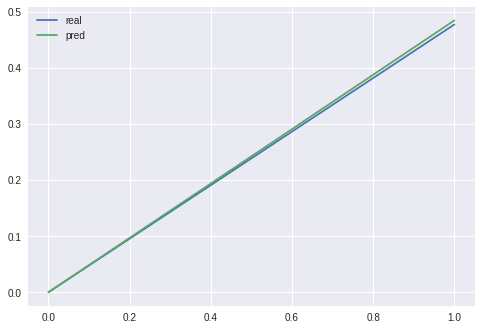

In [0]:
# plot history
pyplot.plot((0,test_yp[0:1,2]), label='real')
pyplot.plot((0,yhat[0,2]), label='pred')
pyplot.legend()
pyplot.show()



## 8.8. Design another LSTM Network model

In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

# Design the LSTM Network

LSTM_model = Sequential()
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(1024, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(512, return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(256))
LSTM_model.add(Dense(3))
LSTM_model.compile(loss='mae', optimizer='adam')

# show the model
print(LSTM_model.summary)

# fit network
history = LSTM_model.fit(train_x, train_y, epochs=5, batch_size=100, validation_data=(val_x, val_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = LSTM_model.predict(test_x)

# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 94.490


array([ -2.90420818,  -0.90420818,  -0.90420818, ..., -15.18464518,
        -0.18933129,  15.80666387])

In [0]:
"""
    Preparing the FALLS DATASETs
    In this cell, we prepare the TRAINING/VAL/TEST DATASET splits for the falls data.
    Using a 70%-20%-10% split
"""

import random
import math
from numpy.random import permutation

df_filenames = df_only_Falls.File
df_filenames = pd.DataFrame(list(set(df_filenames)))


# Randomly shuffle the index of each set (ADLs and Falls)
# -------------------------------------------------------
# First we prepare the sets of ADLs
random_indices = permutation(df_filenames.index)
# Use a test-split (of 30% of the items)
train_split = math.floor(len(df_filenames)*0.7)
val_split = math.floor(len(df_filenames)*0.2)
# Train set with 70% of the items.
df_only_Falls_train_FN = df_filenames.loc[random_indices[0:train_split]]
# Test set with 20% of items
df_only_Falls_val_FN = df_filenames.loc[random_indices[train_split:train_split+val_split]]
# VAL set with 10% of items
df_only_Falls_test_FN = df_filenames.loc[random_indices[train_split+val_split:]]

print("-------TOTAL--------------------")
print(str(len(df_filenames)))
print("-------train_split--------------------")
print(str(train_split))
print(str(len(df_only_Falls_train_FN)))
print("-------VAL_split--------------------")
print(str(val_split))
print(str(len(df_only_Falls_val_FN)))
print("-------Test_split--------------------")
test_split = len(df_filenames)-(train_split+val_split)
print(str(test_split))
print(str(len(df_only_Falls_test_FN)))
print("-------SUMA de_splits--------------------")
print(str(test_split+train_split+val_split))

print("-------HEADS: train + val + test --------------------")
print(df_only_Falls_train_FN.head())
print(df_only_Falls_val_FN.head())
print(df_only_Falls_test_FN.head())
print("---------------------------")

print("-------% train  --------------------")
print(len(df_only_Falls_train_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))
print("-------% val  --------------------")
print(len(df_only_Falls_val_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))
print("-------% test  --------------------")
print(len(df_only_Falls_test_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))


# Test set with 10% of items
df_only_Falls_test = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_test_FN[0])]
# Val set with 20% of items
df_only_Falls_val = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_val_FN[0])]
# Train set with 70% of the items.
df_only_Falls_train = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_train_FN[0])]


print("---------------------------")
print("---------------------------")
print(df_only_Falls_test.head())
print(len(df_only_Falls_test))
print(df_only_Falls_val.head())
print(len(df_only_Falls_val))
print(df_only_Falls_train.head())
print(len(df_only_Falls_train))

print("---------------------------")


-------TOTAL--------------------
1798
-------train_split--------------------
1258
1258
-------VAL_split--------------------
359
359
-------Test_split--------------------
181
181
-------SUMA de_splits--------------------
1798
-------HEADS: train + val + test --------------------
                     0
380   F01_SA02_R01.txt
578   F05_SA02_R04.txt
203   F06_SA20_R01.txt
734   F01_SE06_R05.txt
1040  F07_SA08_R04.txt
                     0
1152  F10_SA22_R01.txt
486   F10_SE06_R03.txt
1022  F01_SA19_R04.txt
1441  F02_SA16_R01.txt
887   F02_SA04_R05.txt
                     0
681   F14_SA08_R02.txt
706   F07_SA13_R05.txt
1134  F12_SA22_R03.txt
543   F14_SA03_R04.txt
1627  F05_SA07_R05.txt
---------------------------
-------% train  --------------------
0.699666295884316
-------% val  --------------------
0.19966629588431592
-------% test  --------------------
0.10066740823136819
---------------------------
---------------------------
       0_Win_ID Act_Type Age_Cat Fall_ADL              Fi

In [0]:
"""
    Preparing the ADLs DATASETs
    In this cell, we prepare the TRAINING/VAL/TEST DATASET splits for the ADLs data.
    Using a 70%-20%-10% split
"""

import random
import math
from numpy.random import permutation

df_filenames = df_only_ADLs.File
df_filenames = pd.DataFrame(list(set(df_filenames)))


# Randomly shuffle the index of each set (ADLs and Falls)
# -------------------------------------------------------
# First we prepare the sets of ADLs
random_indices = permutation(df_filenames.index)
# Use a test-split (of 30% of the items)
train_split = math.floor(len(df_filenames)*0.7)
val_split = math.floor(len(df_filenames)*0.2)
# Train set with 70% of the items.
df_only_ADLs_train_FN = df_filenames.loc[random_indices[0:train_split]]
# Test set with 20% of items
df_only_ADLs_val_FN = df_filenames.loc[random_indices[train_split:train_split+val_split]]
# VAL set with 10% of items
df_only_ADLs_test_FN = df_filenames.loc[random_indices[train_split+val_split:]]

print("-------TOTAL--------------------")
print(str(len(df_filenames)))
print("-------train_split--------------------")
print(str(train_split))
print(str(len(df_only_ADLs_train_FN)))
print("-------VAL_split--------------------")
print(str(val_split))
print(str(len(df_only_ADLs_val_FN)))
print("-------Test_split--------------------")
test_split = len(df_filenames)-(train_split+val_split)
print(str(test_split))
print(str(len(df_only_ADLs_test_FN)))
print("-------SUMA de_splits--------------------")
print(str(test_split+train_split+val_split))

print("-------HEADS: train + val + test --------------------")
print(df_only_ADLs_train_FN.head())
print(df_only_ADLs_val_FN.head())
print(df_only_ADLs_test_FN.head())
print("---------------------------")

print("-------% train  --------------------")
print(len(df_only_ADLs_train_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))
print("-------% val  --------------------")
print(len(df_only_ADLs_val_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))
print("-------% test  --------------------")
print(len(df_only_ADLs_test_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))


# Test set with 10% of items
df_only_ADLs_test = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_test_FN[0])]
# Val set with 20% of items
df_only_ADLs_val = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_val_FN[0])]
# Train set with 70% of the items.
df_only_ADLs_train = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_train_FN[0])]


print("---------------------------")
print("---------------------------")
print(df_only_ADLs_test.head())
print(len(df_only_ADLs_test))
print(df_only_ADLs_val.head())
print(len(df_only_ADLs_val))
print(df_only_ADLs_train.head())
print(len(df_only_ADLs_train))

print("---------------------------")


-------TOTAL--------------------
1798
-------train_split--------------------
1258
1258
-------VAL_split--------------------
359
359
-------Test_split--------------------
181
181
-------SUMA de_splits--------------------
1798
-------HEADS: train + val + test --------------------
                     0
972   D15_SA05_R02.txt
300   D17_SA14_R02.txt
1608  D17_SA13_R03.txt
732   D14_SE01_R01.txt
1561  D09_SA19_R04.txt
                     0
196   D13_SA12_R03.txt
730   D17_SA12_R03.txt
1115  D15_SA14_R05.txt
1472  D18_SA04_R05.txt
1189  D09_SA15_R05.txt
                     0
1247  D05_SA13_R03.txt
367   D16_SA20_R01.txt
365   D05_SE07_R03.txt
58    D12_SA05_R05.txt
1423  D09_SE01_R02.txt
---------------------------
-------% train  --------------------
0.699666295884316
-------% val  --------------------
0.19966629588431592
-------% test  --------------------
0.10066740823136819
---------------------------
---------------------------
     0_Win_ID Act_Type Age_Cat Fall_ADL              File

In [0]:
# Prepare dataset with Test examplars

frames = [df_only_Falls_test, df_only_ADLs_test]
df_ADL_Falls_test = pd.concat(frames)
print("Test ADLs: "+ str(len(df_only_ADLs_test)))
print("Test Falls: "+ str(len(df_only_Falls_test)))
print("Test ALL: "+ str(len(df_ADL_Falls_test)))

print(df_ADL_Falls_test.head())
print(df_ADL_Falls_test.tail())


Test ADLs: 7421
Test Falls: 7421
Test ALL: 14842
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
74210         0      F01      SA        F  F01_SA02_R04.txt       1.372828   
74211         1      F01      SA        F  F01_SA02_R04.txt       0.236132   
74212         2      F01      SA        F  F01_SA02_R04.txt       0.082957   
74213         3      F01      SA        F  F01_SA02_R04.txt       0.036610   
74214         4      F01      SA        F  F01_SA02_R04.txt      -0.081237   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
74210       113     14.660      -109         222    ...           0.549762   
74211       113     18.515       -81         194    ...           0.549762   
74212       113     17.510       -35         148    ...           0.549762   
74213       113     14.995       -44         157    ...           0.549762   
74214       113     13.875       -44         157    ...           0.549762   

       skewne

In [0]:
# Prepare dataset with VALIDATION examplars

frames = [df_only_Falls_val, df_only_ADLs_val]
df_ADL_Falls_val = pd.concat(frames)
print("VAL ADLs: "+ str(len(df_only_ADLs_val)))
print("VAL Falls: "+ str(len(df_only_Falls_val)))
print("VAL ALL: "+ str(len(df_ADL_Falls_val)))

print(df_ADL_Falls_val.head())
print(df_ADL_Falls_val.tail())


VAL ADLs: 14719
VAL Falls: 14719
VAL ALL: 29438
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
73882         0      F01      SA        F  F01_SA01_R01.txt       1.171828   
73883         1      F01      SA        F  F01_SA01_R01.txt       1.165338   
73884         2      F01      SA        F  F01_SA01_R01.txt       1.252298   
73885         3      F01      SA        F  F01_SA01_R01.txt       1.573220   
73886         4      F01      SA        F  F01_SA01_R01.txt       2.841073   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
73882        85     -2.090      -114         199    ...           0.554633   
73883        85     -2.670      -114         199    ...           0.554633   
73884        85     -2.095      -114         199    ...           0.554633   
73885        85      0.385      -114         199    ...           0.554633   
73886        85      4.115      -114         199    ...           0.554633   

       skewnes

In [0]:
# Prepare dataset with Train examplars

frames = [df_only_Falls_train, df_only_ADLs_train]
df_ADL_Falls_train = pd.concat(frames)
print("train ADLs: "+ str(len(df_only_ADLs_train)))
print("train Falls: "+ str(len(df_only_Falls_train)))
print("train ALL: "+ str(len(df_ADL_Falls_train)))

print(df_ADL_Falls_train.head())
print(df_ADL_Falls_train.tail())


train ADLs: 51742
train Falls: 51578
train ALL: 103320
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
74005         0      F01      SA        F  F01_SA01_R04.txt       2.378725   
74006         1      F01      SA        F  F01_SA01_R04.txt       1.758380   
74007         2      F01      SA        F  F01_SA01_R04.txt       1.259635   
74008         3      F01      SA        F  F01_SA01_R04.txt       1.228117   
74009         4      F01      SA        F  F01_SA01_R04.txt       1.033344   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
74005       114     12.435      -181         295    ...           1.137148   
74006       114     10.215      -181         295    ...           1.137148   
74007       114     14.545      -181         295    ...           1.137148   
74008       114     17.245      -181         295    ...           1.105898   
74009       114     16.290      -181         295    ...           1.124796   

       

In [0]:
df_ADL_Falls["max_S1_N_HOR"]

0         1.045606
1         1.045606
2         1.045606
3         1.045606
4         1.029488
5         1.029488
6         1.029488
7         1.029488
8         1.073366
9         1.073366
10        1.073366
11        1.073366
12        1.073366
13        1.073366
14        1.073366
15        1.073366
16        1.073366
17        1.073366
18        1.751473
19        2.098994
20        3.672592
21        3.887103
22        3.887103
23        3.887103
24        3.887103
25        3.887103
26        3.887103
27        3.887103
28        3.887103
29        3.887103
            ...   
147570    0.995902
147571    0.994100
147572    0.994100
147573    0.994100
147574    0.994100
147575    0.994100
147576    0.994100
147577    0.994100
147578    0.994100
147579    1.747714
147580    1.747714
147581    1.747714
147582    1.747714
147583    1.747714
147584    1.747714
147585    1.747714
147586    1.747714
147587    1.747714
147588    1.747714
147589    1.747714
147590    1.747714
147591    1.